<div style="text-align: center; font-size: 2em; font-weight: bold;"> In the name of God </div>
<div style="text-align: center; font-size: 1.5em; font-weight: bold;"> Ali Ghasemzadeh </div>
<div style="text-align: center; font-size: 1.5em; font-weight: bold;"> 401106339 </div>

# 1. DCP Representation with CVX (25 Points)

Disciplined convex programming (DCP) is a system for composing functions while ensuring their convexity. It is the language that underlies CVX. Essentially, each node in the parse tree for a convex expression is tagged with attributes for curvature (convex, concave, affine, constant) and sign (positive, negative), allowing for reasoning about the convexity of entire expressions. Typically, writing problems in the DCP form is trivial, but in some cases, manipulation is required to construct expressions that satisfy the rules.

In [36]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import group_testing as gt

1. For each set of mathematical expressions below, first briefly explain why each defines a convex set. Then, give an equivalent DCP expression along with a brief explanation of why the DCP expression is equivalent to the original for each set. DCP expressions should be given in a form that passes analysis (a green tick on the left of the expression box) at the DCP analyzer. You are welcome to use visualization.


1. **(a)**  
$$\|(x, y, z)\|_2^2 ≤ 1$$
This is a norm of a vector so it is convex function and it is a sublevel set of it so it is a convex set

clearly it is equal to the below expression 

![Alt text](q1_a.png "Optional title")

In [2]:
x_a, y_a, z_a = cp.Variable(), cp.Variable(), cp.Variable()
const_a = [cp.norm2(cp.hstack([x_a, y_a, z_a])) <= 1]
prob_a = cp.Problem(cp.Minimize(0), const_a)
prob_a.solve()

print("prob_a is DCP :", prob_a.is_dcp())
print("prob_a status : ", prob_a.status)
print("prob_a value :", prob_a.value)
print("x_a value : ", x_a.value)
print("y_a value", y_a.value)
print("z_a value", z_a.value)
print(f"constriant : {x_a.value**2 + y_a.value**2 + z_a.value**2} <= 1")

prob_a is DCP : True
prob_a status :  optimal
prob_a value : 0.0
x_a value :  0.0
y_a value 0.0
z_a value 0.0
constriant : 0.0 <= 1


2. **(b)**  
   $$\sqrt{x^2+1} \leq 3x + y$$
   this norm2 of vector [x, 1] -3x - y is less than 0 so it left is a sum of convex functions and it is a sublevel set of a convex function so it is a convex set

   I exactly use this expression in the below 

![Alt text](q1_b.png "Optional title")

In [3]:
x_b = cp.Variable()
y_b = cp.Variable()

const_b = [cp.norm2(cp.hstack([x_b, 1])) <= 3 * x_b + y_b]
prob_b = cp.Problem(cp.Minimize(0), const_b)

prob_b.solve()
print("prob_b is DCP : ", prob_b.is_dcp())
print("prob_b status : ", prob_b.status)
print("prob_b value : ", prob_b.value)
print("x_b value : ", x_b.value)
print("y_b value : ", y_b.value)
print(f"constraint : {np.sqrt(x_b.value**2 +1)} <= {3*x_b.value + y_b.value}" )

prob_b is DCP :  True
prob_b status :  optimal
prob_b value :  0.0
x_b value :  1.1796620910486758e-07
y_b value :  5.689926274497416
constraint : 1.0000000000000069 <= 5.6899266283960435


3. **(c)**  
   $$\frac{1}{x}  + \frac{2}{y} \, \leq 5, \quad x > 0, \quad y > 0$$
   1/x is a convex function and 2/y is too so this is sublevel set of a convex function and it is a convex set
   we also have intersection of covex sets is convex too 

   I exactly use this in the below 

![Alt text](q1_c.png "Optional title")

The final set is the intersection of this with x > 0 and y > 0 and all of these set are convex so the final is convext too

In [5]:
x_c = cp.Variable()
y_c = cp.Variable()
# tolerence = 1e-10
tolerence = 0
const_c  = [x_c >= tolerence, y_c >= tolerence, cp.inv_pos(x_c) + 2*cp.inv_pos(y_c) <=5]
prob_c = cp.Problem(cp.Minimize(0), const_c)

prob_c.solve()
print("prob_c is DCP : ", prob_c.is_dcp())
print("prob_c status : ", prob_c.status)
print("prob_c value : ", prob_c.value)
print("x_c value : ", x_c.value)
print("y_c value : ", y_c.value)
print(f"constraint : {1/x_c.value + 2/y_c._value} <= 5")

prob_c is DCP :  True
prob_c status :  optimal
prob_c value :  0.0
x_c value :  1.3396996273725477
y_c value :  1.468689994776164
constraint : 2.1081937385737204 <= 5


4. **(d)**  
   $$(x + z)y \geq 1 , \quad x + z \, \geq \, 0, \quad y \geq \, 0$$
   z+y > 0 is a convex set 
   we have x+y >= 1/y so we have 1/y - x - y <=0 and 1/y - x - y is a convex function so this a sublevel set of a convex function and is a convex set
   intersection of convex sets is convex too

   quad_over_line(1, y) = 1^2/y and we have (x+y) >= 1/y so they are eqivalent

![Alt text](q1_d1.png "Optional title")
![Alt text](q1_d2.png "Optional title")

In [6]:
x_d = cp.Variable()
y_d = cp.Variable()
z_d = cp.Variable()

const_d = [y_d >= 0, x_d + z_d >= 0,  (x_d + z_d) >= cp.quad_over_lin(1, y_d)]
prob_d = cp.Problem(cp.Minimize(0), const_d)

prob_d.solve()

print("prob_d is DCP : ", prob_d.is_dcp())
print("prob_d status : ", prob_d.status)
print("prob_d value : ", prob_d.value)
print("x_d value : ", x_d.value)
print("y__d value : ", y_d.value)
print("z_d value : ", z_d.value)

print(f"constraint : {(x_d.value + z_d._value)* y_d._value} >= 1")

prob_d is DCP :  True
prob_d status :  optimal
prob_d value :  0.0
x_d value :  1.799622919853366
y__d value :  2.0715025953359474
z_d value :  1.7996229230701497
constraint : 7.455847104868182 >= 1


5. **(e)**  
$$x\sqrt{y} \geq 1, \quad  x \geq \, 0, \quad y \geq \, 0$$
  we have $x\sqrt{y} \geq 1$ so we have $x \geq \frac{1}{\sqrt{y}}$ then we have $\frac{1}{\sqrt{y}} - x \leq 0$ and it is a sublevel set of a convex function because -x is linear and $\frac{1}{\sqrt{y}}$ is convex too
  then we have intersection of some convex sets which is convex 

  it is equal to the below expression because we have geo_mean(y, 1) = $\sqrt{y}$ and quad_over_lin(1, x) = 1/x

![Alt text](q1_e.png "Optional title")

In [7]:
x_e = cp.Variable()
y_e = cp.Variable(nonneg=True)

const_e = [x_e >= 0, y_e >= 0, cp.geo_mean(cp.hstack([y_e, 1])) >= cp.quad_over_lin(1, x_e)]
prob_e = cp.Problem(cp.Minimize(0), const_e)

prob_e.solve()
print("prob_e is DCP : ", prob_e.is_dcp())
print("prob_e status : ", prob_e.status)
print("prob_e value : ", prob_e.value)
print("x_e value : ", x_e.value)
print("y_e value : ", y_e.value)
print(f"constraint : {x_e.value* np.sqrt(y_e.value)} >= 1")

prob_e is DCP :  True
prob_e status :  optimal
prob_e value :  0.0
x_e value :  2.1241214856192125
y_e value :  2.5912900302568773
constraint : 3.4193012413634207 >= 1


6. **(f)**  
$$\log{(e^{y-1} + e^{\frac{x}{2}})} \leq -e^{x}$$
we can write this as (log-sum-exp of vector[y-1, x/2]) + $e^x \leq$ 0
log-sum-exp is a convex function and $e^x$ is too so we have sub level set of a convex function so it is a convex set 
I exactly write this in the below

![Alt text](q1_f.png "Optional title")

In [8]:
x_f = cp.Variable()
y_f = cp.Variable()

const_f = [cp.log_sum_exp(cp.hstack([y_f - 1, x_f/2])) <= -cp.exp(x_f)]
prob_f = cp.Problem(cp.Minimize(0), const_f)
prob_f.solve()
print("prob_f is DCP : ", prob_f.is_dcp())
print("prob_f status : ", prob_f.status)
print("prob_f value : ", prob_f.value)
print("x_f value : ", x_f.value)
print("y_f value : ", y_f.value)
print(f"constraint : {np.log(np.exp(y_f._value - 1) + np.exp(x_f._value/2))} <= {-np.exp(x_f.value)}")

prob_f is DCP :  True
prob_f status :  optimal
prob_f value :  0.0
x_f value :  -6.007894542875341
y_f value :  -3.5640858358564973
constraint : -2.813238522483071 <= -0.0024592606011021477


7. **(g)**   
$$\frac{y^2}{x} + z \leq 1$$

we have quad_over_line is a convex function and z is linear so 
$\frac{y^2}{x} + z$ is a convex function and we have sub level sets of so it is a convex set

![Alt text](q1_g.png "Optional title")

In [9]:
x_g = cp.Variable()
y_g = cp.Variable()
z_g = cp.Variable()

const_g = [cp.quad_over_lin(y_g, x_g) + z_g <= 1]
prob_g = cp.Problem(cp.Minimize(0), const_g)
prob_g.solve()

print(prob_g.is_dcp())
print(prob_g.status)
print(prob_g.value)
print(x_g.value)
print(y_g.value)
print(f"{np.sqrt(y_g.value)/x_g.value + z_g.value} <= 1")

True
optimal
0.0
0.5540970637395163
0.0
-0.5540969724055038 <= 1


8. **(h)**  
   $$x \log{(\frac{x}{y})} \leq x - y, \quad x > 0 , \quad y > 0$$

   we have kl_div(x, y) which is a convex function and we have 
   sub level set of a convex function intersection with convex sets so it is a 
   convex set


![Alt text](q1_h.png "Optional title")

In [14]:
x_h = cp.Variable(nonneg=True)
y_h = cp.Variable(nonneg=True)
epsilon = 1e-9
tolerence = 1e-19

const_h = [x_h >= epsilon, y_h >= epsilon, cp.perspective(f=-cp.log(y_h), s=x_h) <= x_h - y_h]
prob_h = cp.Problem(cp.Minimize(0), const_h)

prob_h.solve(solver=cp.SCS, eps=tolerence)
print(prob_h.is_dcp())
print(prob_h.status)
print(prob_h.value)
print(x_h.value)
print(y_h.value)
print(f"{x_h.value* np.log(x_h.value / y_h.value)} <= {x_h.value - y_h.value}")
print(x_h.value* np.log(x_h.value / y_h.value) <= x_h.value - y_h.value)

True
optimal
0.0
2.643728837798819e-09
2.643728837898488e-09
-9.966874980071238e-20 <= -9.966864636773941e-20
True


2. Is the function: $f(x) = \log{(α + \sum_{i=1}^{n} \frac{\beta_i}{x_i})} + \lambda\|x\|_2 $, where $α \geq 0$, $\beta > 0$, and $\lambda > 0$, convex on $\R_{++}^n$ ? Is it possible to express this into an equivalent DCP expression?  Now, consider the following optimization problem:
$$minimize \quad \log{(\alpha + \sum_{i=1}^{n} \frac{\beta_i}{x_i})} + \lambda \|x\|_2 \\ subject \, to \quad \sum_{i=1}^{n} x_i \leq 1$$
where $x \in \R_+^n$ (the non-negative orthant of $\R^n$), and $\alpha ≥ 0$, $\beta > 0$, and $\lambda > 0$ are fixed problem parameters. Can you use CVX to solve the above problem for given $\alpha, \, \beta$
and $\lambda$? Explain and Present your documents.

we have $\frac{1}{x_i}$ is convex and we have weighted some of them that is convex and then $\alpha$ is added to it as a constant and log of it is concave respect to $x_i$'s and $\lambda \|x\|_2^2$ is convex function so some of them is neither convex nor concave in general

## explanation :
we don't have the convex form for this question but we can write an equivalent to it :
we have $x_i$'s positive so there exists $z_i$'s such that $\frac{1}{x_i}$ is equal to $e^{z_i}$ and we substitute this in the upper objective function :<br>
we get $\log{(\alpha + \sum_{i=1}^{n} \beta_i e^{z_i})} \, + \lambda \|x\|_2$ and first part is weighted log_sum_exp wich is convex and the second one is norm <br>
wich is convex so both functions are convex $\rightarrow$ the sum of them is convex too and the objective function becomes convex now <br> we should check
constraints we had $\sum_{i=1}^{n} e^{-z_i} <= 1$ it is also convex so we change this problem to a convex problem and <br>solve it with cvxpy in the down it is a code : we have $\log{(\alpha + \sum_{i=1}^{n} \beta_i e^{z_i})} = \log{(\alpha + \sum_{i=1}^{n} e^{\log(\beta_i) + z_i})}$ we can write $\alpha$ as <br>
$e^{\log{\alpha}*1}$ and so we stack $[\log{(\alpha)}, \log{(\beta_1)} + z_1, ..., \log{(\beta_n)} + z_n]$ and get log-sum-exp of it and write it as below:

In [3]:
n = 10
lambda_param = 2
alpha = 1
beta = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

x2 = cp.Variable(n, pos=True)
z2 = cp.Variable(n, pos=True)
const2 = [cp.sum(cp.exp(-z2)) <= 1]
obj2 = cp.Minimize(cp.log_sum_exp(cp.hstack([cp.log(alpha)] + [cp.log(beta[i]) + z2[i] for i in range(n)]) + lambda_param* cp.norm2(cp.exp(-z2))))

prob2 = cp.Problem(obj2, const2)
prob2.solve(solver=cp.SCS, eps=1e-9)
x2 = cp.exp(-z2)
print("prob_2 is DCP : ", prob2.is_dcp())
print("Prob_ 2 status : ", prob2.status)
print("prob_2 value : ", prob2.value)
print("z2 value : ", z2.value)
print("x2 value : ", x2.value)
print("cheking the answer : ", cp.log(alpha + beta @ cp.inv_pos(x2)).value + lambda_param * cp.norm2(x2).value)

prob_2 is DCP :  True
Prob_ 2 status :  optimal
prob_2 value :  6.880821887468063
z2 value :  [2.922087   2.64723655 2.48979722 2.3794778  2.29465579 2.22581468
 2.16792312 2.1179991  2.07413043 2.03501801]
x2 value :  [0.05382125 0.07084672 0.08292678 0.09259892 0.10079608 0.10797941
 0.114415   0.12027204 0.12566565 0.13067813]
cheking the answer :  6.880821887468063


# 2D Lasso Problem (15 Points)

Using CVX, we will solve the 2D lasso problem and its variants:

- $$\min_{\theta \in \R^{mn}} \, \frac{1}{2} \sum_{i=1}^{m} (y_i - \theta_i)^2 +  \lambda \sum_{(i, j) \in E}^{}|\theta_i - \theta_j|$$

The set **E** is the set of all undirected edges connecting horizontally or vertically neighboring pixels in the image. More specifically, (i, j) ∈ E if and only if pixel i is the immediate neighbor of pixel j on the left, right, above, or below.



1.Load the basic test data from "toy.csv" and solve the 2d lasso problems with $\lambda$ = 1.
Report the objective value obtained at the solution and plot the solution and original
data as images. Why does the shape change its form? What category of convex
problem is it? (LP, QP, SOCP, SDP and so on)


$\textbf{answer :}$ we define an upper bound $z_{ij}$ for $|\theta_j - \theta_i|$ and we can write this objective as $\frac{1}{2} \|y - \theta\|_2^2 + \lambda s$ with constraint $|\theta_j - \theta_i| \leq s$ and it can be written as $\theta_j - \theta_i \leq s, \theta_j - \theta_i \geq s$ so it is convex function with form QP

we have the L1 regularization term and it makes the denoised image to be sparse
and because of that we have some lines instead of smooth circle in the denoised image.

In [2]:
# initialize parameters for part1 : 
data = pd.read_csv("toy.csv", header=None).values
m, n = data.shape
y1 = data.flatten()
theta1 = cp.Variable(m * n)
lambda1 = 1  # Regularization parameter

In [3]:
# find E 
E = []
for i in range(m):
    for j in range(n):
        if i < m - 1:  # down neighbor
            E.append((i * n + j, (i + 1) * n + j))
        if j < n - 1:  # right neighbor 
            E.append((i * n + j, i * n + j + 1))
E = np.array(E)

In [4]:
# solve problem 
diffs = theta1[E[:, 0]] - theta1[E[:, 1]]

# Objective function
objective1 = (0.5 * cp.sum_squares(y1 - theta1) + lambda1 * cp.norm1(diffs))

problem1 = cp.Problem(cp.Minimize(objective1))
problem1.solve()

# Reshape theta to a 2D grid
theta_solution = theta1.value.reshape(m, n)

Objective value: 199.76906252633307


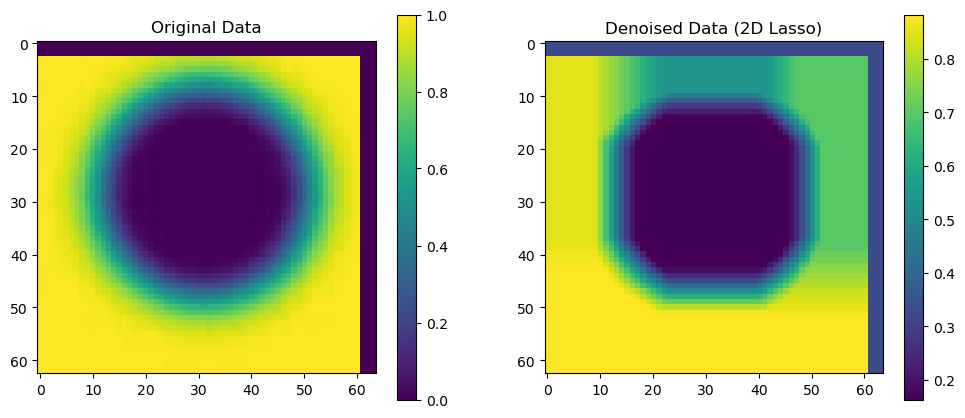

In [10]:
# Plot the results
print(f"Objective value: {problem1.value}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.imshow(data)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Denoised Data (2D Lasso)")
plt.imshow(theta_solution)
plt.colorbar()

plt.show()


2.Another way to formulate the 2d lasso problem is as follows:

- $$\min_{\theta \in \R^{m*n}} \frac{1}{2} \sum_{a=1}^{m}\sum_{b=1}^{n}(y_{a,b} - \theta_{a, b})^2 + \lambda \sum_{a=1}^{m-1} \sum_{b=1}^{n-1} \|(\theta_{a, b} - \theta_{a+1}{b}, \theta{a, b} - \theta_{a, b+1})\|_p$$


Note that the index a, b here refers to the coordinates of pixel i. When taking a 1-norm (p = 1), the formulation reduces to the 2d fused lasso mentioned above, and the
latter term is called an “anisotropic” total variation penalty. When taking a 2-norm
(p = 2), the term is called an “isotropic” total variation penalty.
Solve the “isotropic” 2d lasso problems with $\lambda$ = 1 on "toy.csv". Report the objective value obtained at the solution and plot the solution and original data as images.
Informally speaking, why is the output different from the “anisotropic” penalty, and
what’s the difference? What category of convex problem is it? (LP, QP, SOCP, SDP
and so on)
Hint: For cvxpy users, the diff function, the hstack function, and the axis option in
the norm function would be useful. For Matlab CVX users, there is a norms(x,p,dim)
function that can compute the norm along different dimensions.

$\textbf{answer : }$ 
## Anisotropic Penalty:
- Applies separate penalties to pixel differences along rows and columns, allowing independent smoothing in horizontal and vertical directions. This approach can maintain sharp edges in one direction while smoothing in the other, resulting in less blurring compared to the isotropic penalty.
## Isotropic Penalty: 
- Penalizes the combined gradient of pixel differences across rows and columns, promoting equal smoothness in all directions. This produces a uniformly smoothed effect, where edges are blurred equally in both directions. As demonstrated in the plot, the isotropic penalty yields a smoother overall result compared to the anisotropic penalty.

in this part we have l-p norm as regularization term and it and p=2 so we have more smooth regularization term and and because of it we have smoother border than the last part and it seems like a circle not a polyhedron
this problem is QP because the first part is form of QP and we can write the second part to a QP problem too we can write an upper bound on it and then minimize it for upper bound and add constriant that the second part is less than upper bound :
$$\min_{\theta \in \R^{m*n}} \frac{1}{2} \sum_{a=1}^{m}\sum_{b=1}^{n}(y_{a,b} - \theta_{a, b})^2 + \lambda \sum_{a=1}^{m-1} \sum_{b=1}^{n-1} s_{a,b}$$


$$s.t. \, \, \, \, \, \, \forall_{a,b} \,  \, \, \|(\theta_{a,b}-\theta_{a+1,b}, \theta_{a,b}-\theta_{a,b+1})\|_p \leq s_{a, b}$$
we can write the constraint for p = 2 as 
$$s.t. \, \, \, \, \, \, \forall_{a,b} \,  \, \, (\theta_{a,b}-\theta_{a+1,b}, \theta_{a,b}-\theta_{a,b+1})^T(\theta_{a,b}-\theta_{a+1,b}, \theta_{a,b}-\theta_{a,b+1}) \leq s_{a, b}^2$$
so we have a QP problem 

In [11]:
# initialize the parameters for part2 : 
theta2 = cp.Variable((m, n))
lambda2 = 1  # Regularization parameter
y2 = data
p = 2

In [12]:
# Calculate differences along rows and columns
row_diff = theta2[:-1, :-1] - theta2[1:, :-1]  # Differences along rows
col_diff = theta2[:-1, :-1] - theta2[:-1, 1:]  # Differences along columns

In [13]:
# Stack the differences and compute norms
diffs = cp.vstack([cp.reshape(row_diff, -1), cp.reshape(col_diff, -1)])  # Flatten differences
reg = cp.sum(cp.norm(diffs, p, axis=0))  # Sum of norms along axis 0
objective2 = cp.Minimize(cp.sum_squares(y2 - theta2) + lambda2 * reg)
problem2 = cp.Problem(objective2)
problem2.solve()
theta_solution2 = theta2.value.reshape(m, n)

Objective value: 208.47235878041255


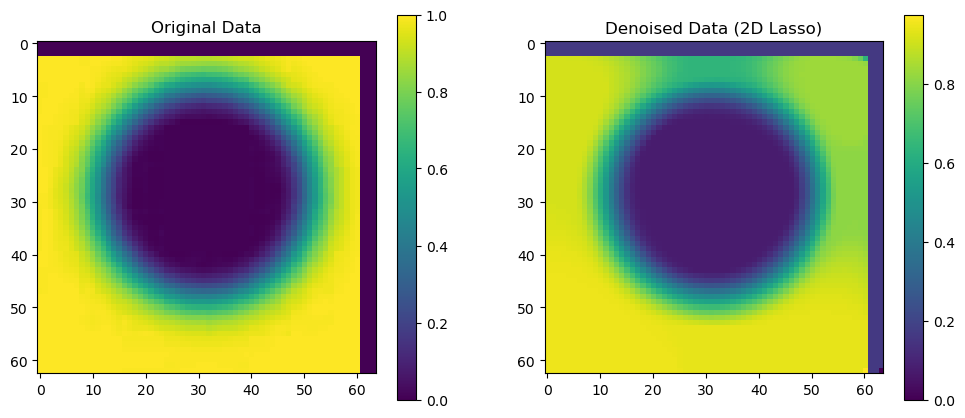

In [15]:
# Plot the results
print(f"Objective value: {problem2.value}")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("Original Data")
plt.imshow(data)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("Denoised Data (2D Lasso)")
plt.imshow(theta_solution2)
plt.colorbar()

plt.show()


3. Next, we consider how the solution changes as we vary $\lambda$. Load a grayscale 64×64 pixel
image from "baboon.csv" and solve the isotropic and anisotropic 2d lasso problem
for this image for $\lambda$ ∈ {$10^{\frac{-(2k+1)}{4}}$ : k = 0, 1, ..., 4}. For each $\lambda$, report the value of the
optimal objective value, plot the optimal image and show a histogram of the pixel
values (100 bins between values 0 and 1). What change in the histograms can you
observe with varying $\lambda$ for the isotropic and anisotropic penalties?

$\textbf{answer : }$ As $\lambda$ increases we see that the weights become near to zero because of regularization term

In [17]:
# initialize the parameters for part3 :
# Load the grayscale image from 'baboon.csv'
image = np.genfromtxt("baboon.csv", delimiter=',')
n, m = image.shape
# Define the range of λ values
lambdas = [10**(-(2*k + 1)/4) for k in range(5)]

In [18]:
# function to calculate reg for different p's
def baboon(p, lam, n, m, image):
    X = cp.Variable((n, m))
    DX = X[:-1, :-1] - X[1:, :-1]
    DY = X[:-1, :-1] - X[:-1, 1:]

    diffs = cp.vstack([cp.reshape(DX, -1), cp.reshape(DY, -1)])
    reg = cp.sum(cp.norm2(diffs, axis=0))
    obj = cp.Minimize(cp.norm(X - image, "fro")**2 + lam* reg)
    Problem = cp.Problem(obj)
    Problem.solve()

    return Problem, obj, X

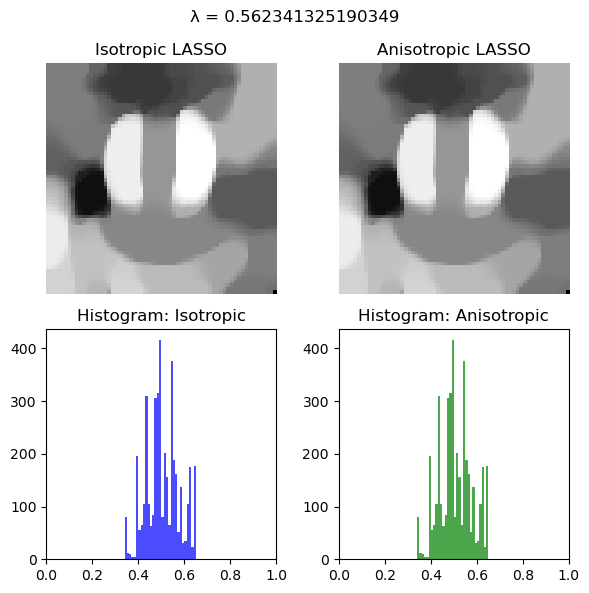

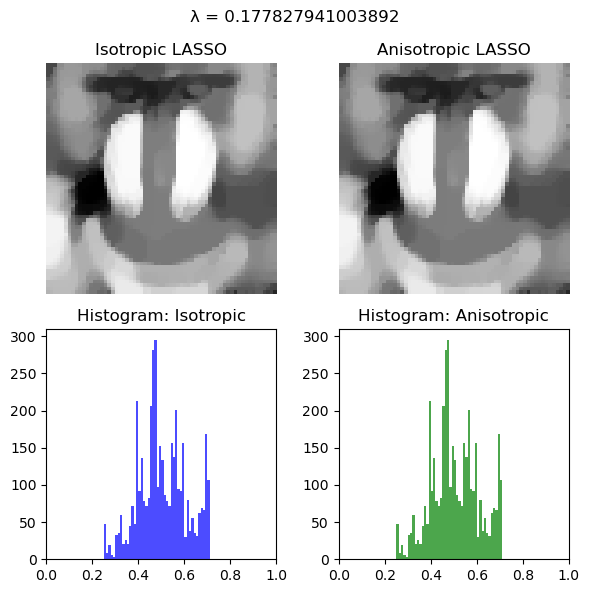

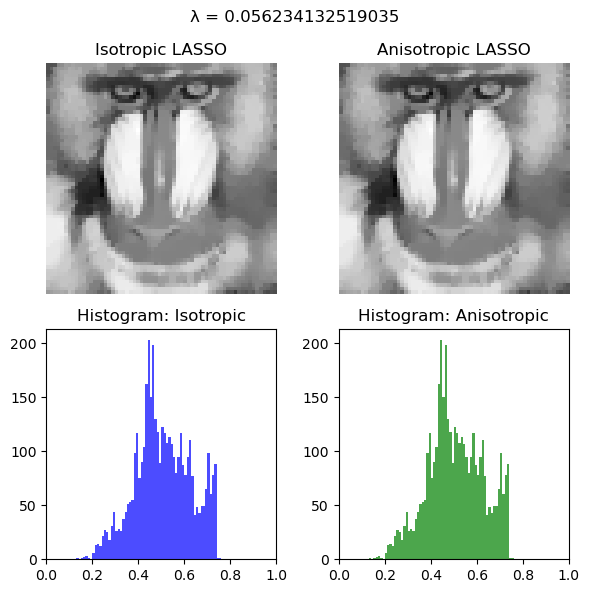

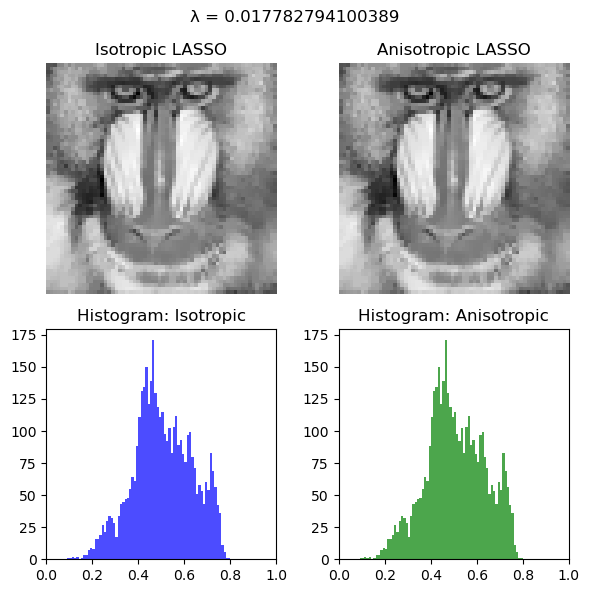

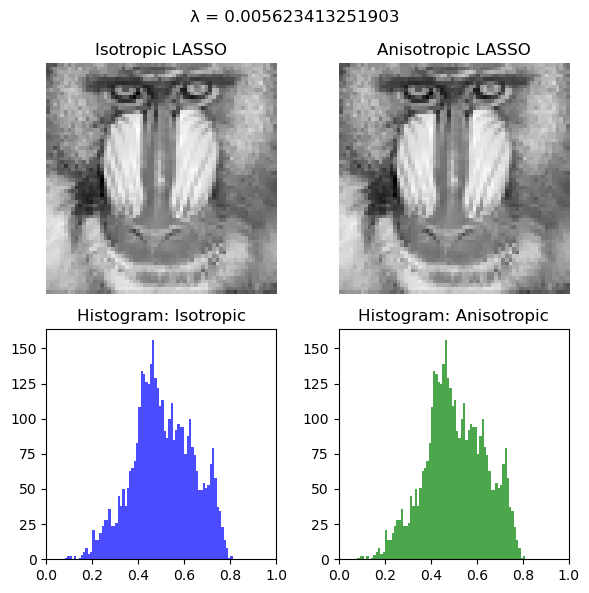

In [32]:
# Placeholder for results
results = {"lambda": [], "objective_isotropic": [], "objective_anisotropic": []}
for lam in lambdas:
    prob_anisotropic, obj_anisotropic, X_anisotropic = baboon(1, lam, n, m, image)
    prob_isotropic, obj_isotropic, X_isotropic = baboon(2, lam, n, m, image)
    results['lambda'].append(lam)
    results['objective_isotropic'].append(obj_isotropic.value)
    results['objective_anisotropic'].append(obj_anisotropic.value)

    # # Plot the results
    fig, axs = plt.subplots(2, 2, figsize=(6, 6))
    fig.suptitle(f"λ = {lam:.15f}")
    
    # Optimal images
    axs[0, 0].imshow(X_isotropic.value, cmap='gray')
    axs[0, 0].set_title("Isotropic LASSO")
    axs[0, 0].axis("off")
    
    axs[0, 1].imshow(X_anisotropic.value, cmap='gray')
    axs[0, 1].set_title("Anisotropic LASSO")
    axs[0, 1].axis("off")
    
    # Histograms
    axs[1, 0].hist(X_isotropic.value.ravel(), bins=100, range=(0, 1), color='blue', alpha=0.7)
    axs[1, 0].set_title("Histogram: Isotropic")
    axs[1, 0].set_xlim(0, 1)
    
    axs[1, 1].hist(X_anisotropic.value.ravel(), bins=100, range=(0, 1), color='green', alpha=0.7)
    axs[1, 1].set_title("Histogram: Anisotropic")
    axs[1, 1].set_xlim(0, 1)
    
    plt.tight_layout()
    plt.show()

In [31]:
# Print results
for i, lam in enumerate(results["lambda"]):
    print(f"λ = {lam:.15f}: Isotropic Objective = {results['objective_isotropic'][i]:.15f}, "
          f"Anisotropic Objective = {results['objective_anisotropic'][i]:.15f}")

λ = 0.562341325190349: Isotropic Objective = 52.481507837982775, Anisotropic Objective = 52.481507837982775
λ = 0.177827941003892: Isotropic Objective = 28.458357960231560, Anisotropic Objective = 28.458357960231560
λ = 0.056234132519035: Isotropic Objective = 13.210318665481241, Anisotropic Objective = 13.210318665481241
λ = 0.017782794100389: Isotropic Objective = 5.206152241963315, Anisotropic Objective = 5.206152241963315
λ = 0.005623413251903: Isotropic Objective = 1.804833354444880, Anisotropic Objective = 1.804833354444880


### 3. Group Testing (15 pt)
In this problem we will explore the idea of group testing as a strategy For testing a large
population for a rare disease by pooling samples together. Suppose that we have a population of N people and we collect saliva samples from each of them. We are looking for
genetic signatures of a particular virus in these samples. Let xn denote the concentration
of this material in the sample for the n
th person. We will assume that for healthy people
xn = 0, but for infected people, xn > 0. Our testing procedure will be to form a series of
M mixtures of samples from different subsets of people, and then only run tests on these
mixtures. The goal here is to set M < N, and the question is then whether we can identify
the infected people from the results of these tests.
We will consider the following approach: we will form mixtures by constructing random
combinations of samples, and we will attempt to recover the original x using a simple
convex optimization problem.
To mathematically represent the sampling/testing process, assume that we will ultimately
run M tests, each of which will tell us the concentration of viral material in the combined
sample being tested. For each person, their sample will be divided into K < M equal
portions, which will be assigned at random to the M tests. We will do this independently
for each of the N people. We can ultimately represent the concentration of viral material



in each of the mixed samples that we will ultimately test as a vector y ∈ R<sup>M</sup>.
We can
write y as
y = Ax, <br>
where A is a matrix that represents the assignment of people to mixed samples/tests.
Specifically, A is a M × N matrix where each column is constructed independently by
picking K entries at random, setting them to 1, and setting the remaining entries to 0.
Suppose there is no noise in our tests, so that we can estimate y perfectly. Our inference
problem is now to estimate x given knowledge of y and A. In general, since M < N,
recovering x is impossible. However, when x is sparse, meaning that it has only a few
nonzeros (in this case meaning that most of the population is negative), then recovering x
is possible, although this fact was only broadly appreciated within the last 15 years or so.
We will try to estimate x by solving the following optimization problem:
$$Minimize \, \|x\|_1 $$  
$$ s.t. \quad  \, Ax = y, \newline x  \geq 0. $$
Below we will explore when and how well this works.


- (a) Suppose that you are testing a population of size N = 1000, but you can only process
M = 100 tests. Assume that only 1% of the population is positive (meaning that
there will be 10 infected individuals). Each person’s sample will be split and added
to K = 10 different batches. The file group testing.py contains code that sets up
this problem. Use CVXPY to solve the optimization problem above and verify that
this approach correctly identifies the 10 infected individuals

In [35]:
x_a = cp.Variable(gt.N, nonneg=True)
objective_a = cp.Minimize(cp.norm1(x_a))
const_a = [gt.A @ x_a == gt.y, x_a >= 0]
prob_a = cp.Problem(objective_a, const_a)
prob_a.solve()

# Compare the results
x_estimated = x_a.value
detected_indices = np.where(x_estimated > 1e-6)[0]  # Small threshold for numerical precision
print(f"True infected indices: {np.sort(gt.ind0)}")
print(f"Detected infected indices: {np.sort(detected_indices)}")

# Check if detection was successful
success = set(detected_indices) == set(gt.ind0)
print(f"Detection success: {success}")

True infected indices: [ 15 101 107 148 344 353 379 553 812 941]
Detected infected indices: [ 15 101 107 148 344 353 379 553 812 941]
Detection success: True


- (b) Experiment with K. In practice, you might not want to divide a person’s sample into
too many tests. How low can you set K before things begin to fail?
      
   $\textbf{answer : }$ respect to the outputs in the below we can select k=3 before failure

In [36]:
for K in [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]:
    # Recreate A for new K
    A_b = np.zeros((gt.M, gt.N))
    for i in range(gt.N):
        ind = np.random.choice(gt.M, K, replace=False)
        A_b[ind, i] = 1
    y_b = A_b @ gt.x0
    # Solve the problem again
    x_b = cp.Variable(gt.N, nonneg=True)
    objective = cp.Minimize(cp.norm1(x_b))
    constraints = [A_b @ x_b == y_b, x_b >= 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()

    x_estimated = x_b.value
    detected = np.where(x_estimated > 1e-8)[0]
    success = set(detected) == set(gt.ind0)
    print(f"K={K}: Success={success}")


K=10: Success=True
K=9: Success=True
K=8: Success=True
K=7: Success=True
K=6: Success=True
K=5: Success=True
K=4: Success=True
K=3: Success=True
K=2: Success=False
K=1: Success=False


- (c) Suppose that the prevalence of the disease begins to grow beyond 1%. How widespread
can the disease become before the approach begins to fail (holding M and N fixed)?
As the disease becomes more widespread, you may need to adjust K. What value
of K seems to work best when the spread of the disease is just below the threshold
where the approach begins to fail?
- $\textbf{answer : }$ respect to the output we the threshold is 3% and before that threshold we can recognize the disease 

In [33]:
# Function to set up group testing problem
def setup_group_testing(N, S, M, K, seed=None):
    if seed is not None:
        np.random.seed(seed)
    ind0 = np.random.choice(N,S,0) # index subset 
    x0 = np.zeros(N) 
    x0[ind0] = np.random.rand(S)

    # Define A
    A = np.zeros((M,N))
    for i in np.arange(N):
        ind = np.random.choice(M,K,replace=False)
        A[ind,i] = 1

    y = A @ x0

    return A, x0, y, ind0

In [34]:
# Function to experiment with varying disease prevalence and K
def experiment_with_prevalence_and_K(N, M, prevalence_rate, K_values, seed=None):
    S = int(N * prevalence_rate)
    success = False
    detected_indices = None
    ind0 = None
    accepted_K = []
    # Try different values of K
    for K in K_values:
        A, x0, y, ind0 = setup_group_testing(N, S, M, K, seed)

        x = cp.Variable(N, nonneg=True)
        objective = cp.Minimize(cp.norm1(x))
        constraints = [A @ x == y, x >= 0]
        problem = cp.Problem(objective, constraints)
        problem.solve()

        # Compare the results
        x_estimated = x.value
        detected_indices = np.where(x_estimated > 1e-5)[0]
        success = set(detected_indices) == set(ind0)

        # If the detection is successful, record the best K
        if success:
            accepted_K.append(K)

    return accepted_K

In [35]:
def prev_rate_with_random(seed=None):
    prevalence_rates = [0.01, 0.015, 0.02, 0.025, 0.03, 0.031, 0.032, 0.033, 0.034, 0.035]
    K_values = [50 - i for i in range(50)]  # Different values of K to test
    final_Ks = []
    # Run the experiment for each prevalence rate
    for prevalence_rate in prevalence_rates:
        Ks = experiment_with_prevalence_and_K(gt.N, gt.M, prevalence_rate, K_values, seed)
        print(f"Prevalence: {prevalence_rate*100: .1f}%")
        print(f"accepted K's : {Ks}")
        final_Ks.append(Ks)
    return final_Ks

In [44]:
final_Ks = prev_rate_with_random(100)

Prevalence:  1.0%
accepted K's : [50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4]
Prevalence:  1.5%
accepted K's : [50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4]
Prevalence:  2.0%
accepted K's : [50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5]
Prevalence:  2.5%
accepted K's : [50, 45, 36, 35, 34, 27, 26, 14, 13, 12, 11, 10, 9, 8, 7, 5]
Prevalence:  3.0%
accepted K's : [9]
Prevalence:  3.1%
accepted K's : []
Prevalence:  3.2%
accepted K's : []
Prevalence:  3.3%
accepted K's : []
Prevalence:  3.4%
accepted K's : []
Prevalence:  3.5%
accepted K's : []


### 4. Learning Quadratic Metrics from Distance (15 pt)
Consider a collection of N pairs of points in $\R^n$
, represented as $x_1, . . . , x_N$ and $y_1, . . . , y_N$ .
Alongside these, we have a series of positive distances $d_1, . . . , d_N$ > 0.
The objective is to identify a quadratic pseudo-metric d.<br>

$$ d(x, y) = ((x-y)^T P (x-y))^\frac{1}{2} $$

with $P \in S_n^+ $ , which approximates the given distances, i.e., $d(x_i
, y_i) ≈ d_i$
. (The pseudometric d is a metric only when P ≻ 0; when P ⪰ 0 is singular, it is a pseudo-metric.)
To do this, we will choose $P \in S_n^+$ that minimizes the mean squared error objective
$$\frac{1}{N} \sum_{i=1}^N(d_i - d(x_i, y_i))^2$$

In [45]:
# Load the data from the file
data = np.load("LQM_data.npz")
# Extract variables
x_train = data["X_train"]
y_train = data["Y_train"]
d_train = data["d_train"]
x_test = data["X_test"]
y_test = data["Y_test"]
d_test = data["d_test"]

# Check the shape of the loaded data
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("d_train shape:", d_train.shape)

print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)
print("d_test shape:", d_test.shape)

X_train shape: (5, 100)
Y_train shape: (5, 100)
d_train shape: (100,)
X_test shape: (5, 10)
Y_test shape: (5, 10)
d_test shape: (10,)


- (a) Explain how to determine P using convex or quasiconvex optimization methods. If
you are unable to provide an exact formulation (one that guarantees minimization of
the total squared error objective), propose an approximate formulation that minimizes
the objective function as closely as possible, while adhering to the given constraints.

- $\textbf{answer : }$ we change $x_i-y_i$ to $z_i$ so we get $\frac{1}{N} \sum_{i=1}^{N} (d_i - d(x_i, y_i))^2 = \frac{1}{N} \sum_{i}^{N} (d_i - \sqrt{z_i^TPz_i})^2 = \sum_{i=1}^{N} d_i^2 + z_i^TPz_i - 2d_i\sqrt{z_i^TPz_i} = \sum_{i=1}^{N} d_i^2 + tr(P z_iz_i^T) - 2d_i \sqrt{tr(P z_iz_i^T) }$ we have $tr(Pz_iz_i^T)$ is linear and $\sqrt{tr(Pz_iz_i^T)}$ is concave so the 
$-\sqrt{tr(Pz_iz_i^T)} $ is convex and d_i is a constant respect to P so this is a convex function 

- (b) Calculate the optimal matrix P using the training data provided in the LQM data.npz
file, and then output the mean squared error on the test data. You can load the
LQM data.npz file using numpy.load.


In [46]:
# we have 100 d's so we should have 100 x_i and y_i with shape (5, 1)
n = x_train.shape[0]

# Define the symmetric matrix P
P = cp.Variable((n, n), symmetric=True)

Z = x_train - y_train

const_b = [P >> 0]  # P should be Positive Semidefinite
obj_b = cp.Minimize(cp.norm2(cp.diag(Z.T @ P @ Z) - d_train))
prob_b = cp.Problem(obj_b, const_b)
prob_b.solve()

print(prob_b.is_dcp())
print(prob_b.status)
print(prob_b.value)
print(P.value)

True
optimal
22.98287132634433
[[ 0.35478765 -0.11990286  0.09431292 -0.14654656  0.07116515]
 [-0.11990286  0.83171659 -0.23725701  0.03726778  0.10994237]
 [ 0.09431292 -0.23725701  0.67514043 -0.04550574 -0.12637735]
 [-0.14654656  0.03726778 -0.04550574  0.59441373 -0.13364511]
 [ 0.07116515  0.10994237 -0.12637735 -0.13364511  0.45377496]]


### 5. Fitting a sphere to data (15 pt)
Consider the problem of fitting a sphere $\{x \in \R^n | \, \|x - x_c\|_2 = r\}$ to m points $u_1, . . . , u_m \in \R^n$, by minimizing the error function
$$\sum_{i=1}^{m}(\|u_i - x_c \|_2^2 - r^2)^2$$
over the variables $x_c \in \R^n, \, \, r \in R$

In [126]:
# Load data
data = np.load('Q5.npz')
u = data['U']
u = u.T
m, n = u.shape
m, n   

(50, 2)

- (a) Explain how to solve this problem using convex or quasiconvex optimization. The
simpler your formulation, the better. (For example: a convex formulation is simpler than a
quasiconvex formulation; an LP is simpler than an SOCP, which is simpler than an SDP.)
Be sure to explain what your variables are, and how your formulation minimizes the error
function above.


- $\textbf{answer : }$ as summary of solving this question we rewrite this problem as this :

    changing $r^2$ to s then we have :
    if we get derivative respect to s two times we get m wich is positive so the function is convex on s and we can use the optimal s so :
    $\sum_{i=1}^{m} (\|u_i-x_c\|_2^2 - s)^2$ so we get derivative respect to s and we get $s = \frac{\sum_{i}^{m} \|u_i-x_c\|_2^2}{m}$ then we substitue this amount in the objective function 

    and then we get $\frac{1}{m} \sum_{i, j} (\|u_i-x_c\|_2^2 - \|u_j - x_c\|_2^2)^2$ then we get $\frac{1}{m} \sum_{i, j} ((u_i^Tu_i - u_j^Tu_j) + 2x_c^T(u_i - u_j))^2$ then we get 

    $\sum_{i, j} (u_i^Tu_i - u_j^Tu_j)^2 - \sum_{i, j} (4x_c^T(u_i-u_j)(u_i^Tu_i - u_j^Tu_j)) + \sum_{i, j} (4x_c^T (u_i-u_j)(u_i-u_j)^Tx_c)$

    then if we get derivative from this function respect to $x_c$ two times we get matrix $\sum_{i, j} (u_i-u_j)(u_i-u_j)^T$ and if we multiply v to it 

    $v^T(\sum_{i, j} (u_i-u_j)(u_i-u_j)^T)v$ we get $\sum_{i, j} v^T(u_i-u_j)(u_i-u_j)^Tv$ = $\sum_{i, j} ((u_i-u_j)^Tv)^2 \, \geq 0$

    so the matrix is PSD and the objective is convex we have the objective 

    $\frac{1}{m}( x_c^T (4\sum_{i,j} (u_i - u_j)(u_i - u_j)^T)x_c + (-4\sum_{i, j} (u_i^Tu_i - u_j^Tu_j)(u_i-u_j))^Tx_c + \sum_{i,j} (u_i^Tu_i - u_j^Tu_j)^2)$ 

    we can write it as $x_c^T P x_c + q^T x_c + r$ so we have a QP problem with no constraints 
    we can also write it as 

- (b) Use your method to solve the problem instance with data given in the file Q5.npz, with
n = 2. Plot the fitted circle and the data points.

In [144]:
xc = cp.Variable(n)
r = 0
q = np.zeros((n, ))
p = np.zeros((n, n))

for i in range(m):
    for j in range(m):
        diff_u = u[i, :] - u[j, :]
        diff_norm = u[i, :]@u[i, :] - u[j, :]@u[j, :]
        r += diff_norm**2
        q += -4*diff_norm * diff_u
        p += 4*np.outer(diff_u, diff_u)

r /= m
p /= m/2
q /= m

obj = cp.Minimize(1/2*(cp.quad_form(xc, p)) + q @ xc + r)
prob = cp.Problem(obj)

prob.solve()
print(p)
print("prob_c is dcp : ", prob.is_dcp())
print("prob_c status : ", prob.status)
print("Optimal value:", prob.value)
print("Optimal x_c:", xc.value)

[[5.43299756e+02 5.02833519e-01]
 [5.02833519e-01 8.10659891e+02]]
prob_c is dcp :  True
prob_c status :  optimal
Optimal value: 1.1130144450289663
Optimal x_c: [-2.58690471  6.48834954]


In [145]:
s = 0
for i in range(m):
    s += cp.sum_squares(u[i, :] - xc).value / m
print("optimal r^2 : ", s)
print("Optimal r : ", np.sqrt(s))

optimal r^2 :  1.7036161616340837
Optimal r :  1.305226479057977


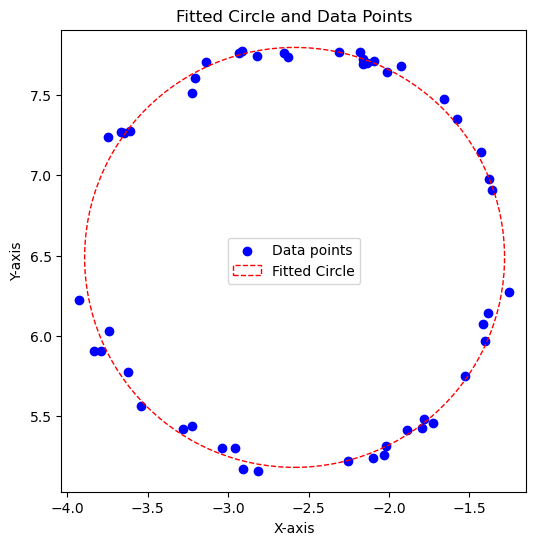

In [146]:
plt.figure(figsize=(6, 6))

# Plot the data points
plt.scatter(u[:, 0], u[:, 1], label='Data points', color='blue')

circle = plt.Circle((xc.value[0], xc.value[1]), radius=np.sqrt(s), color='red', fill=False, linestyle='--', label="Fitted Circle")
plt.gca().add_artist(circle)

# Customize the plot
plt.title('Fitted Circle and Data Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.axis('equal')
plt.show()

### 6. Minimax Rational Fit to the Exponential (15 pt)
We consider the problem with data
$$ti = −3 + 6(i − 1)/(k − 1),  \quad y_i = e^{t_i}, i = 1, . . . , k, $$
where k = 201. (In other words, the data are obtained by uniformly sampling the exponential function over the interval [−3, 3].) Find a function of the form
$$f(t) = \frac{a_0 + a_1 t + a_2 t^2}{1 + b_1 t + b_2 t^2}$$
that minimizes $\max_{i=1,...,k} |f(t_i) - y_i|$. (We require that $1 + b_1 t_i + b_2 t_i^2 > 0$ for i = 1, . . . , k.)
Find optimal values of $a0, a_1, a_2, b_1, b_2$, and give the optimal objective value, computed to
an accuracy of 0.001.

In [51]:
k = 201
t = np.linspace(-3, 3, k)
y = np.exp(t)
Tpowers = np.vstack([np.ones(k), t, t**2]).T
u = np.exp(3)
l = 0
tolerence = 1e-3

In [57]:
# Bisection method
while u - l >= tolerence:
    gamma = (l + u) / 2
    
    a = cp.Variable(3) # [a0, a1, a2]
    b = cp.Variable(2) # [b1, b2]
    
    # for a fixed gamma : for all i=1...k we have |f(t_i)-y_i| <= gamma
    # it means |a0 + a1*t_i + a2*t_i^2 - y_i*(1 + b1*t_i + b2*t_i^2)| <= gamma * |1 + b1*t_i + b2*t_i^2|
    # for i=1...k we also have 1 + b1*t_i + b2*t_i^2 >= 0
    constraints = [
        cp.abs(Tpowers @ a - cp.multiply(y, Tpowers @ cp.hstack([1, b]))) 
        <= gamma * (Tpowers @ cp.hstack([1, b])),
        (Tpowers @ cp.hstack([1, b])) >= 0
    ]
    
    # no specific objective, just feasibility problem
    problem = cp.Problem(cp.Minimize(0), constraints)
    problem.solve(solver=cp.SCS)
    
    if problem.status == cp.OPTIMAL:
        u = gamma
        a_opt = a.value
        b_opt = b.value
        objval_opt = gamma
    else:
        l = gamma

b_opt_add_one = np.hstack([1, b_opt])
y_fit = (Tpowers @ a_opt) / (Tpowers @ b_opt_add_one)

In [58]:
print(f"Optimal values:")
print(f"a0 = {a_opt[0]:.4f}, a1 = {a_opt[1]:.4f}, a2 = {a_opt[2]:.4f}")
print(f"b1 = {b_opt[0]:.4f}, b2 = {b_opt[1]:.4f}")

Optimal values:
a0 = 1.0098, a1 = 0.6122, a2 = 0.1136
b1 = -0.4144, b2 = 0.0485


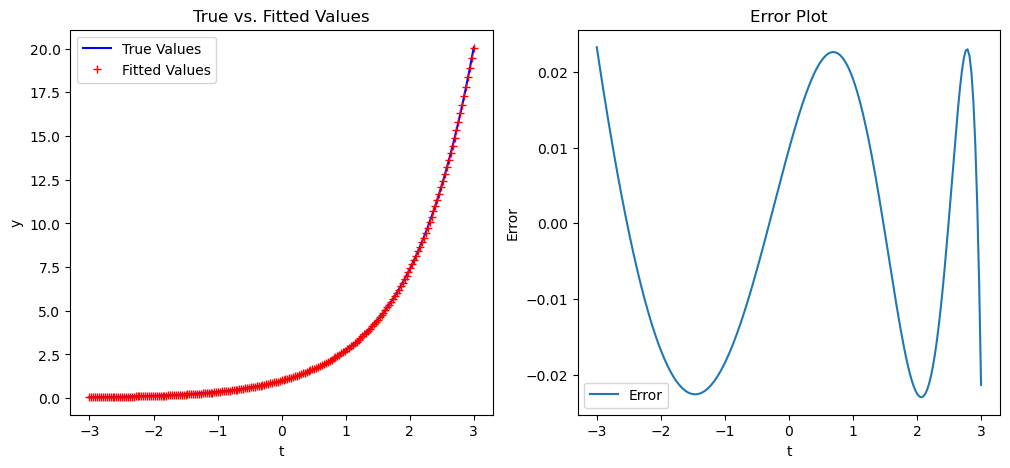

In [59]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

axs[0].plot(t, y, 'b', label='True Values')
axs[0].plot(t, y_fit, 'r+', label='Fitted Values')
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].legend()
axs[0].set_title('True vs. Fitted Values')

axs[1].plot(t, y_fit - y, label='Error')
axs[1].set_xlabel('t')
axs[1].set_ylabel('Error')
axs[1].legend()
axs[1].set_title('Error Plot')

plt.show()